# Assignment Week 3

### Import libraries

In [45]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')



### Import the file 

In [46]:
df= pd.read_csv('turtle_reviews_new.csv') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   language        2000 non-null   object 
 8   platform        2000 non-null   object 
 9   product         2000 non-null   int64  
 10  review          2000 non-null   object 
 11  summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 187.6+ KB


### Delete not needed columns

In [47]:
# Drop unnecessary columns 
df_new = df.drop(columns = ['gender','age','remuneration','spending_score','loyalty_points','education','language',
                            'platform','product'])
                               
print (df_new)

      Unnamed: 0                                             review  \
0              0  When it comes to a DM's screen, the space on t...   
1              1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2              2  Nice art, nice printing.  Why two panels are f...   
3              3  Amazing buy! Bought it as a gift for our new d...   
4              4  As my review of GF9's previous screens these w...   
...          ...                                                ...   
1995        1995  The perfect word game for mixed ages (with Mom...   
1996        1996  Great game.  Did not think I would like it whe...   
1997        1997  Great game for all.........\nKeeps the mind ni...   
1998        1998                                          fun game!   
1999        1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon

### Checking for  missing values

In [48]:
# Any missing values?
df_new.isnull()

,Unnamed: 0,review,summary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1995,False,False,False
1996,False,False,False
1997,False,False,False
1998,False,False,False


### Change the data to lower case and join the elements in each column (review and summary).

In [49]:
# Transform data to lowercase.
df_new['review'] = df_new['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_new['summary'] = df_new['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df_new['review'].head()
df_new['summary'].head()


0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### Replace punctuation in each of the columns (review and summary).

In [50]:
# Remove punctuation.
df_new['review'] = df_new['review'].str.replace('[^\w\s]','')

# Preview the result.
df_new['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [51]:
# Remove punctuation.
df_new['summary'] = df_new['summary'].str.replace('[^\w\s]','')

# Preview the result.
df_new['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [52]:
# Check the number of duplicate values in the Review column.
df_new.review.duplicated().sum()

50

In [53]:
# Drop duplicates.
survey = df_new.drop_duplicates(subset=['review'])

# Preview data.
survey.reset_index(inplace=True)
survey.head()

,index,Unnamed: 0,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [54]:
# Check the number of duplicate values in the Summary column.
df_new.summary.duplicated().sum()

649

In [55]:
# Drop duplicates.
survey = df_new.drop_duplicates(subset=['summary'])

# Preview data.
survey.reset_index(inplace=True)
survey.head()

,index,Unnamed: 0,review,summary
0,0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,4,as my review of gf9s previous screens these we...,money trap


In [56]:
# View the shape of the data.
df_new.shape

(2000, 3)

In [57]:
# String all the comments together in a single variable for the review column
# Create an empty string variable.
all_comments = ''
for i in range(survey.shape[0]):
    # Add each comment.
    all_comments = all_comments + df_new['review'][i]

### Visualisation of the WordCloud 

In [58]:
# installement of the library for visualisation 
!pip install WordCloud

In [59]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [60]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

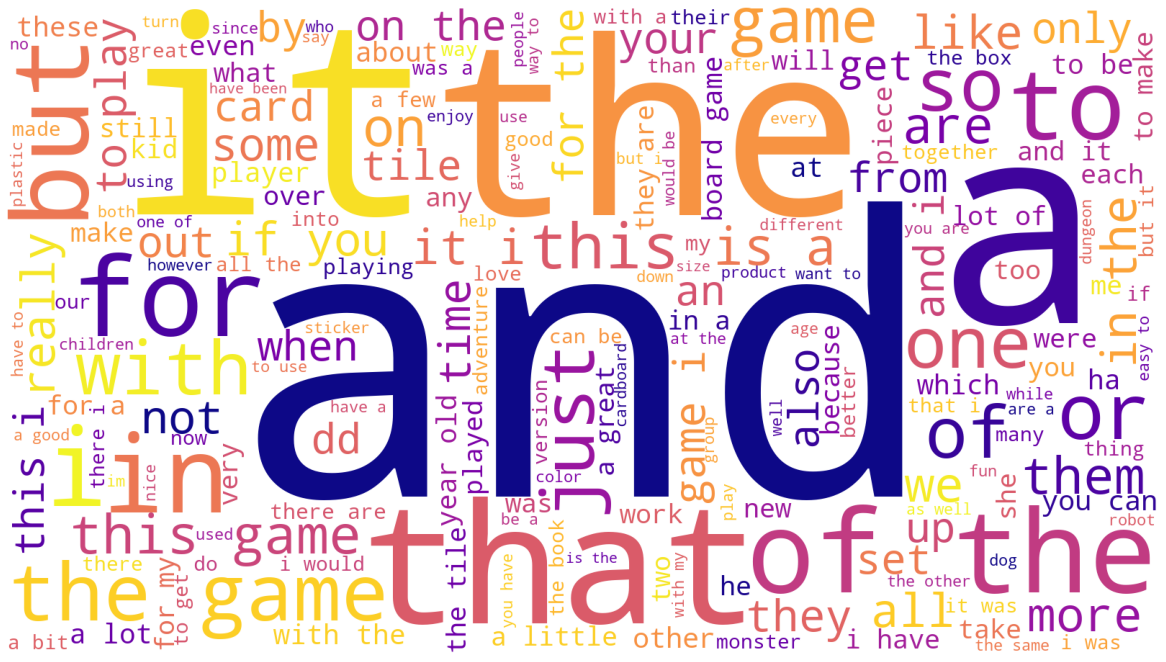

In [61]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Note that your word cloud might differ slightly from the one provided.

### Tokenisation 

In [62]:
# Install NLTK library.
!pip install nltk

# Import the library.
import nltk

# Install the required tokenisation model.
nltk.download('punkt')

# Install the required tokenisation function.
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# Tokenise the words.
df_new['tokens'] = df_new['review'].apply(word_tokenize)

# Preview data.
df_new['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [64]:
# Tokenise the words.
df_new['tokens'] = df_new['summary'].apply(word_tokenize)

# Preview data.
df_new['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [65]:
# Define an empty list of tokens.
all_tokens = []

for i in range(survey.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + df_new['tokens'][i]

In [66]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens)

# Preview data.
fdist

FreqDist({'stars': 294, 'five': 234, 'game': 205, 'great': 203, 'the': 195, 'a': 154, 'for': 146, 'to': 140, 'and': 123, 'fun': 114, ...})

In [67]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1 = [word for word in all_tokens if word.isalnum()]

### Eliminate Stopwords

In [68]:
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Visualising the tokens of relevance in a word cloud

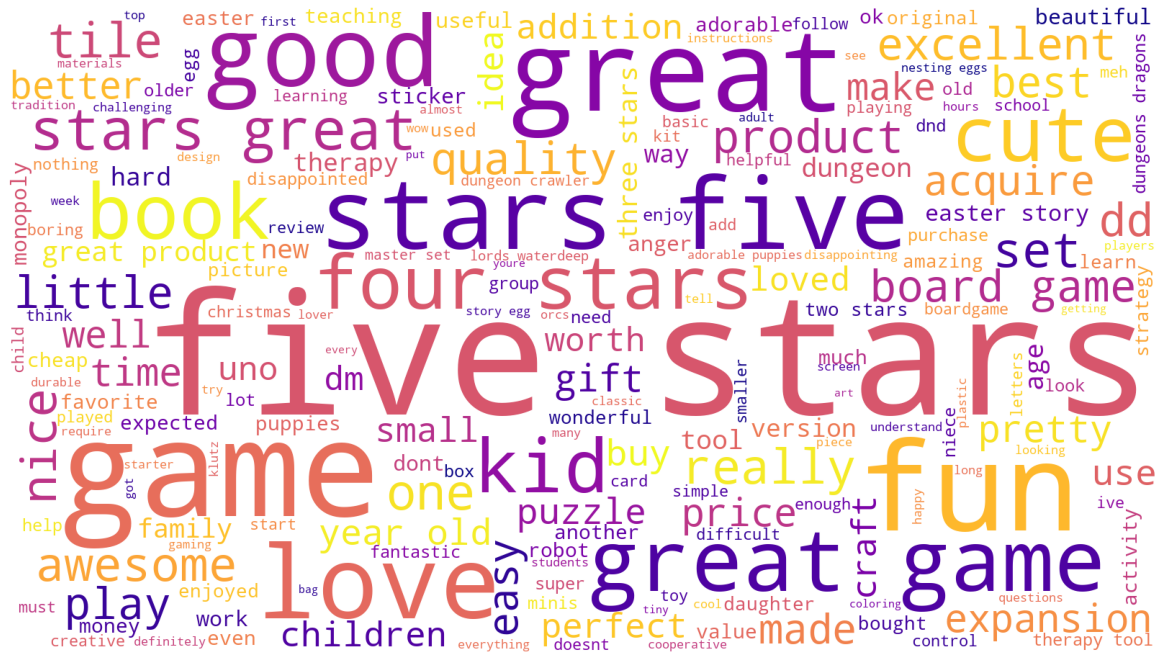

In [69]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### Counting the top 15 words

In [70]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'stars': 294, 'five': 234, 'game': 205, 'great': 203, 'fun': 114, 'good': 72, 'love': 66, 'like': 45, 'cute': 42, 'four': 41, ...})

In [71]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
stars,294
five,234
game,205
great,203
fun,114
good,72
love,66
like,45
cute,42


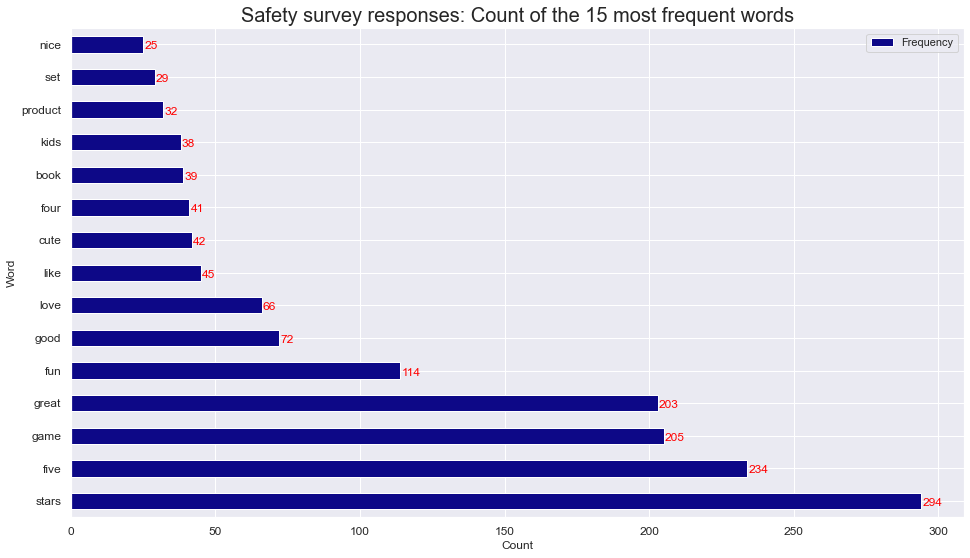

In [72]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

### Calculation of Sentiment Polarity

In [73]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\laura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
darth_vader = SentimentIntensityAnalyzer()

In [75]:
# Run through a dictionary comprehension to take every cleaned tweet 
# Next run the polarity score function on the string.
# This will return four values in a dictionary

results_list_values_token_nostop_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in df_new}

### Creating the pandas data frame

In [76]:
# Convert the list of dictionary results to a pandas dataframe. 
# The index is the cleaned tweet.
# We can see some of the highly positive words 
polarity_pd = pd.DataFrame(df_new).T

# View the DataFrame.
polarity_pd

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
review,when it comes to a dms screen the space on the...,an open letter to galeforce9 your unpainted mi...,nice art nice printing why two panels are fill...,amazing buy bought it as a gift for our new dm...,as my review of gf9s previous screens these we...,grandson loves,i have bought many gm screens over the years b...,came in perfect condition,could be better but its still great i love the...,my review will mirror others in that this kind...,...,fun for the family just make certain you agree...,addicted to this game,great game to keep the mind active we play it ...,gift,we are retired and find this a great way to st...,the perfect word game for mixed ages with mom ...,great game did not think i would like it when ...,great game for all keeps the mind nimble,fun game,this game is fun a lot like scrabble without a...
summary,the fact that 50 of this space is wasted on ar...,another worthless dungeon masters screen from ...,pretty but also pretty useless,five stars,money trap,five stars,best gm screen ever,five stars,great but could be even better,another missed opportunity not a value add to ...,...,sort of a card game equivalent of scrabble and...,five stars,great game to keep the mind active,gift,a great mind game,the perfect word game for mixed ages with mom,super fun,great game,four stars,love this game
tokens,"[the, fact, that, 50, of, this, space, is, was...","[another, worthless, dungeon, masters, screen,...","[pretty, but, also, pretty, useless]","[five, stars]","[money, trap]","[five, stars]","[best, gm, screen, ever]","[five, stars]","[great, but, could, be, even, better]","[another, missed, opportunity, not, a, value, ...",...,"[sort, of, a, card, game, equivalent, of, scra...","[five, stars]","[great, game, to, keep, the, mind, active]",[gift],"[a, great, mind, game]","[the, perfect, word, game, for, mixed, ages, w...","[super, fun]","[great, game]","[four, stars]","[love, this, game]"


In [77]:
# Install TextBlob.
!pip install textblob

# Import the necessary package.
from textblob import TextBlob

In [78]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df_new['polarity'] = df_new['review'].apply(generate_polarity)

# Preview the result.
df_new['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

In [79]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df_new['subjectivity'] = df_new['review'].apply(generate_subjectivity)

# Preview the result.
df_new['subjectivity'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity, dtype: float64

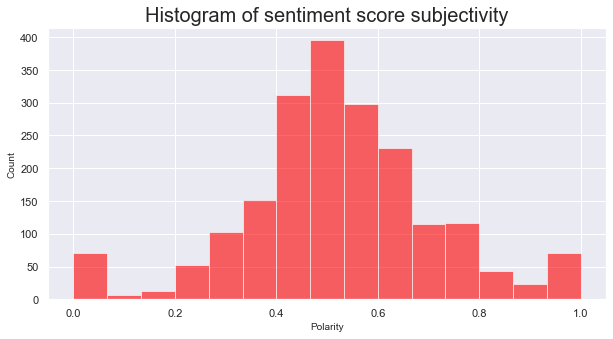

In [80]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df_new['subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Histogram of sentiment score subjectivity', fontsize=20)

plt.show();

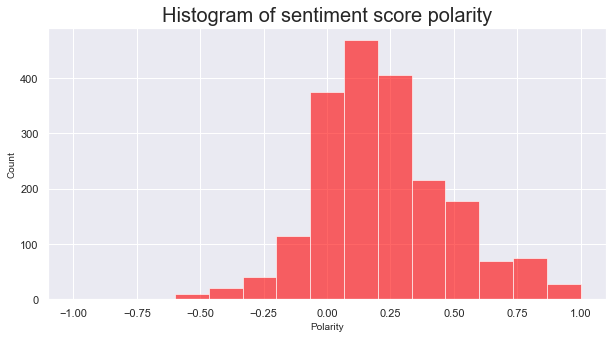

In [81]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df_new['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();

In [82]:
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each comment.
df_new['polarity'] = df_new['summary'].apply(generate_polarity)

# Preview the result.
df_new['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

In [83]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
df_new['subjectivity'] = df_new['summary'].apply(generate_subjectivity)

# Preview the result.
df_new['subjectivity'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity, dtype: float64

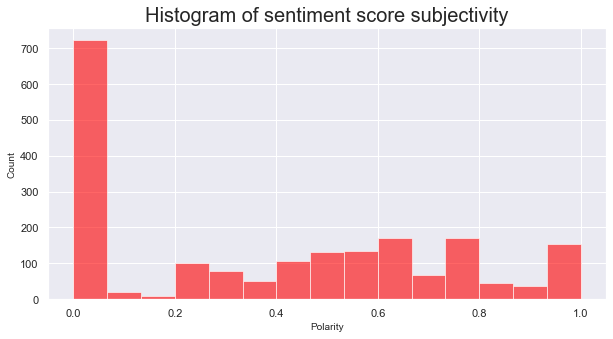

In [84]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df_new['subjectivity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Histogram of sentiment score subjectivity', fontsize=20)

plt.show();

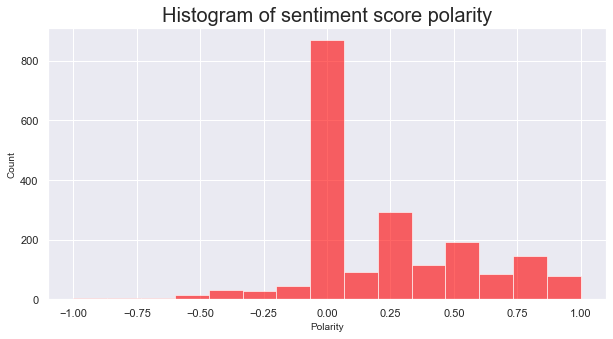

In [85]:
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(10,5))

# Define the bars.
n, bins, patches = plt.hist(df_new['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();